<a href="https://colab.research.google.com/github/shubha3/CGS698c-Bayesian-Data-Analysis-and-Modelling/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Shubha Sankar Banerjee
# M.Sc. Statistics Y20

# Bayesian Models and Data Analysis (CGS698C) Assignment 1

In [ ]:
import scipy as sc
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\DELL\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Question 1

## (a)
The following function $ss$ is used to generate samples which are to be used as observed data. With the help of the same function, we take samples from posterior distribution and plot. We obtain the estimated value of the parameter denoting probability of success and the 95% HDI.

In [ ]:
def ss(tt,pp,aa,bb):
    toss=tt
    
    fig, axes= plt.subplots(3,2,figsize=(10,10))
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    k=0
    for i in np.arange(3):
        for j in np.arange(2):
            
        
            data=sc.stats.bernoulli.rvs(p=pp,size=toss[k])
            with pm.Model() as model:
                # Prior
                theta=pm.Beta('theta',aa,bb)
        
                # Likelihood
                lik=pm.Bernoulli('lik',theta,observed=data)
            
                #posterior sam
                sim=pm.sample()
            
                ax=axes[i,j]
                az.plot_posterior(sim,credible_interval=0.95,ax=ax)
                ax.set_xlabel(f"No of tosses: {toss[k]}")
                ax.set_xlim((0,1))
                k=k+1
    plt.tight_layout()
    return axes
            

## (b)
### (i)
We keep the target value of the parameter $\theta\ (\theta \in\ (0,\ 1)$ fixed. We first consider a <b>Non-Informative prior</b>. In this case we consider $\beta(1,\ 1)$ distribution as our prior distribution.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:05<00:00, 380.34draws/s]
The acceptance probability does not match the target. It is 0.8871376271518544, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:06<00:00, 310.81draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi

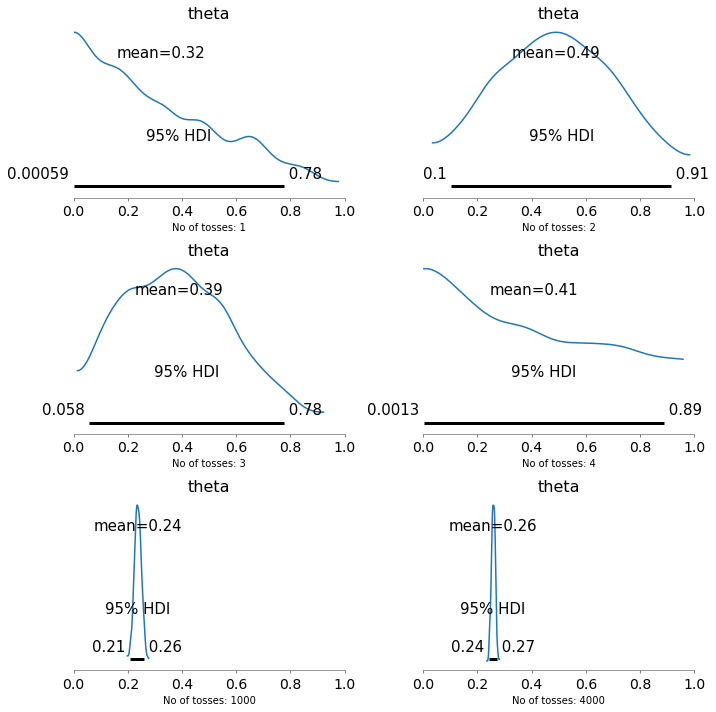

In [ ]:
trial=np.array([1,2,3,4,1000,4000])
ss(trial,0.25,1,1)
plt.show()

### (ii)
We consider an Informative prior with peak ar $p=0.25$. For this case, we will consider $\beta(2,\ 3)$ distribution as our prior distribution.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:05<00:00, 392.25draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:06<00:00, 292.46draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:09<0

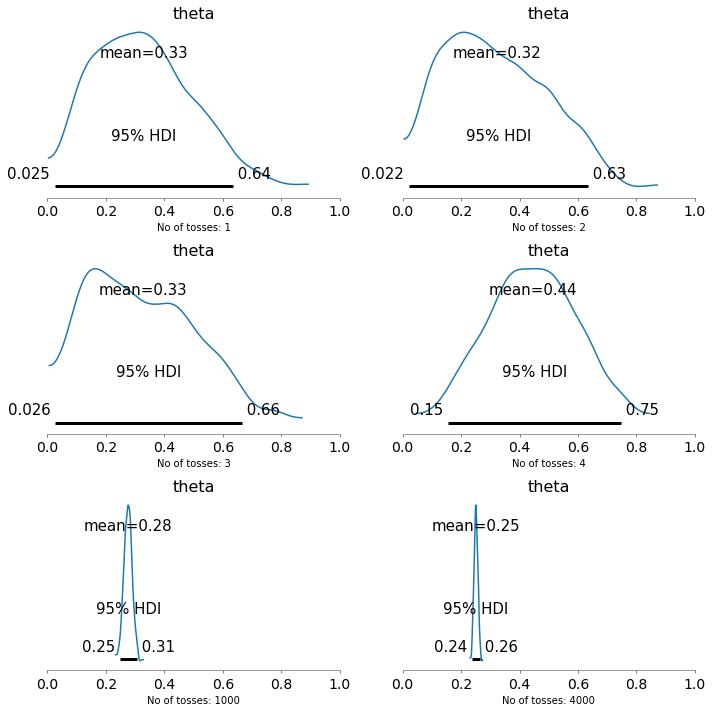

In [ ]:
trial=np.array([1,2,3,4,1000,4000])
ss(trial,0.25,2,3)
plt.show()

### (iii)
We consider an Informative prior with peak ar $p=0.5$. For this case, we will consider $\beta(4,\ 4)$ distribution as our prior distribution.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:05<00:00, 361.54draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:06<00:00, 300.09draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:10<0

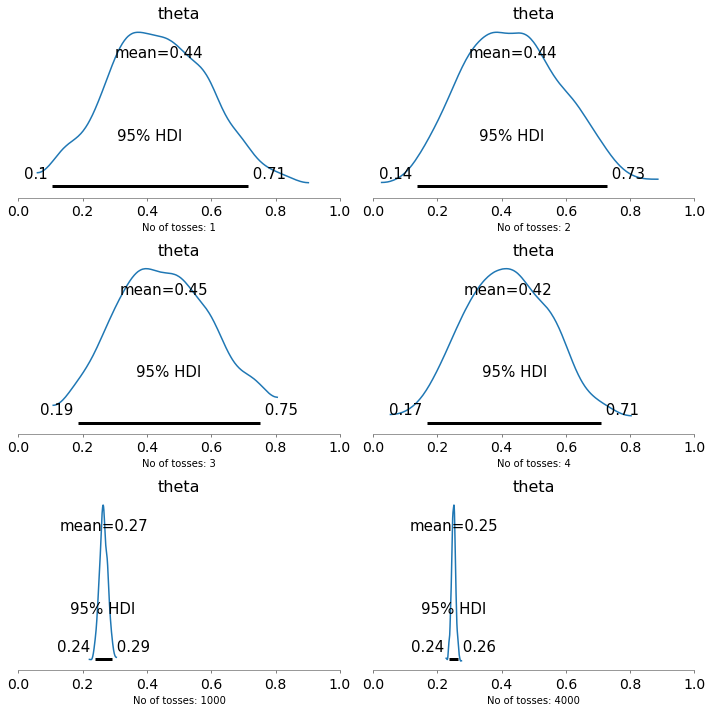

In [ ]:
trial=np.array([1,2,3,4,1000,4000])
ss(trial,0.25,4,4)
plt.show()

### (iv)
We consider an Informative prior with peak ar $p=0.75$. For this case, we will consider $\beta(4,\ 2)$ distribution as our prior distribution.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:04<00:00, 404.84draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:06<00:00, 298.55draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:06<0

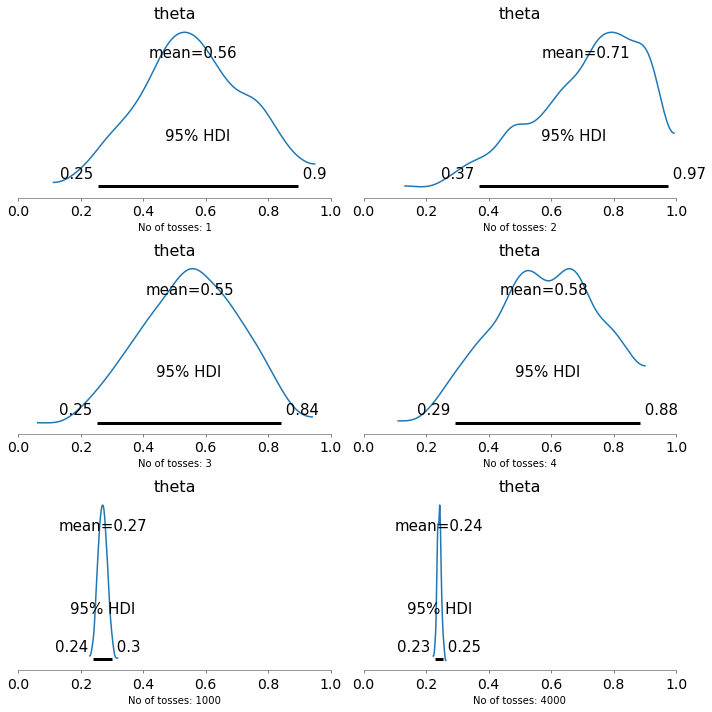

In [ ]:
trial=np.array([1,2,3,4,1000,4000])
ss(trial,0.25,4,2)
plt.show()

## (c)
Now we will see if taking 4 data items one-by-one yields the same posterior as one obtained by taking the points all together at once.

As before, we are taking $p=0.25$ as the target value of the parameter $\theta$.

In [ ]:
# Generate samples from Bernoulli distribution which we will consider as our observed data 
d=np.array(sc.stats.bernoulli.rvs(p=0.25,size=4))
d      

array([1, 0, 1, 0])

We will now take each one one by one, and use the corresponding likelihoods sequentially.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta1]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:04<00:00, 445.65draws/s]
The acceptance probability does not match the target. It is 0.8827109918797883, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta1]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:06<00:00, 305.24draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS

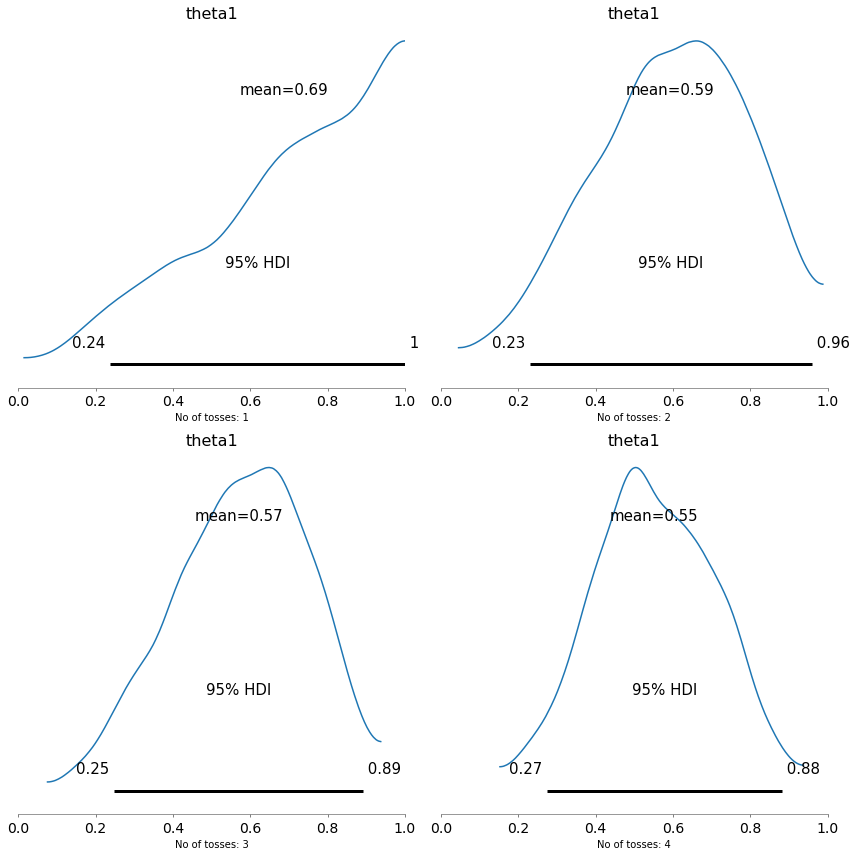

In [ ]:
fig, axes= plt.subplots(2,2,figsize=(12,12))
fig.tight_layout()
fig.subplots_adjust(top=0.88)
n1=1
n2=1
with pm.Model() as model1:
            # Prior 1
            theta1=pm.Beta('theta1',n1,n2)
        
            # Likelihood 1
            lik1=pm.Bernoulli('lik1',theta1,observed=d[0])
            
            #posterior 1
            sim1=pm.sample()
            n1=n1+d[0]
            n2=n2+(1-d[0])
            ax=axes[0,0]
            az.plot_posterior(sim1,credible_interval=0.95,ax=ax)
            ax.set_xlabel("No of tosses: 1")
            ax.set_xlim((0,1))
with pm.Model() as model1:
            # Prior 2
            theta1=pm.Beta('theta1',n1,n2)
        
            # Likelihood 2
            lik1=pm.Bernoulli('lik1',theta1,observed=d[:2])
            
            #posterior 2
            sim1=pm.sample()
            n1=n1+d[1]
            n2=n2+(1-d[1])
            ax=axes[0,1]
            az.plot_posterior(sim1,credible_interval=0.95,ax=ax)
            ax.set_xlabel("No of tosses: 2")
            ax.set_xlim((0,1))
with pm.Model() as model1:
            # Prior 3
            theta1=pm.Beta('theta1',n1,n2)
        
            # Likelihood 3
            lik1=pm.Bernoulli('lik1',theta1,observed=d[:3])
            
            #posterior 1
            sim1=pm.sample()
            n1=n1+d[2]
            n2=n2+(1-d[2])
            ax=axes[1,0]
            az.plot_posterior(sim1,credible_interval=0.95,ax=ax)
            ax.set_xlabel("No of tosses: 3")
            ax.set_xlim((0,1))
with pm.Model() as model1:
            # Prior 4
            theta1=pm.Beta('theta1',n1,n2)
        
            # Likelihood 1
            lik1=pm.Bernoulli('lik1',theta1,observed=d[:4])
            
            #posterior 1
            sim1=pm.sample()
            n1=n1+d[3]
            n2=n2+(1-d[3])
            ax=axes[1,1]
            az.plot_posterior(sim1,credible_interval=0.95,ax=ax)
            ax.set_xlabel("No of tosses: 4")
            ax.set_xlim((0,1))
plt.tight_layout()

We will now take all the data at once.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta2]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:06<00:00, 286.80draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(


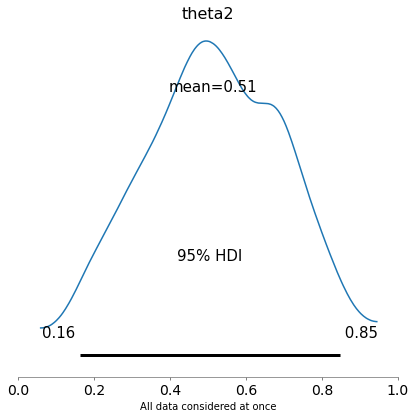

In [ ]:
fig, axes= plt.subplots(1,1,figsize=(6,6))
fig.tight_layout()
fig.subplots_adjust(top=0.88)

with pm.Model() as model2:
    # Prior
    theta2=pm.Beta('theta2',1,1)
    # Like all
    likelihood1=pm.Bernoulli('likelihood1',theta2,observed=d)
    
    #pos all
    simall=pm.sample()
    
    ax=axes
    az.plot_posterior(simall,credible_interval=0.95,ax=ax)
    ax.set_xlabel("All data considered at once")
    ax.set_xlim((0,1))
    
    

# Question 2

## (a)
We will first create a data generator by assuming reasonable values of three parameters $\beta_0$, $\beta_1$ and $\sigma$.
Our Model is $$w\ =\ \beta_0\ +\ \beta_1 h+\ \epsilon$$ where $\epsilon \sim N(0,\ \sigma^2)$. The response variable is $w$ denoting the weight and the regressor is $h$ denoting the height.

In [ ]:
import scipy as sc
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\DELL\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## (b)
### (i)
We will first consider non-informative priors on the the model parameters.

In [ ]:
# We will consider the model where intercept parameter is -222.5 and slope parameter is 5.49
# Height measured in inches and weight in pounds

def gen(tt):
    trial=tt
    intercept_assumed= -222
    slope_assumed= 5.49
    h=sc.stats.norm.rvs(loc=70,scale=20,size=trial)
    model=intercept_assumed+(slope_assumed*h)
    sig= 20    # an assumption
    w_data=sc.stats.norm.rvs(loc=model,scale=sig)
    
    with pm.Model() as reg:
        
        # Prior on the model parameters
        b1=pm.Normal('b1',0,500)
        b2=pm.Normal('b2',0,500)
        s=pm.Uniform('s',0,25)
    
        # Expected Value of Outcome
        mm=b1+(b2*h)
    
        #likelihood
        
        lik420=pm.Normal('lik420',mm,s,observed=w_data)
    
        # Posterior
        sp=pm.sample()
    
        az.plot_posterior(sp,credible_interval=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s, b2, b1]
Sampling 2 chains, 3 divergences: 100%|██████████| 5000/5000 [02:20<00:00, 35.46draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6694455105320896, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(


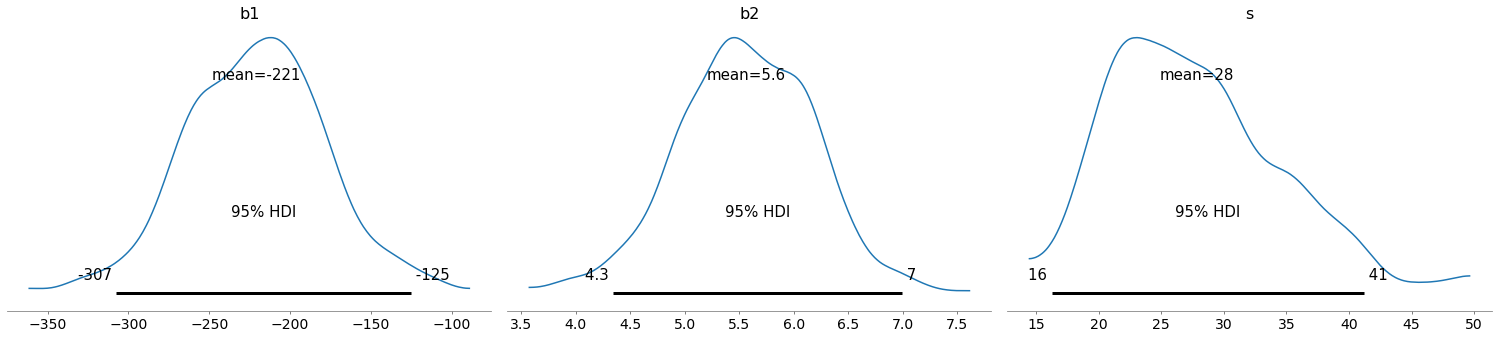

In [ ]:
# Sample Size 10
gen(10)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s, b2, b1]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [08:21<00:00,  9.97draws/s]
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(


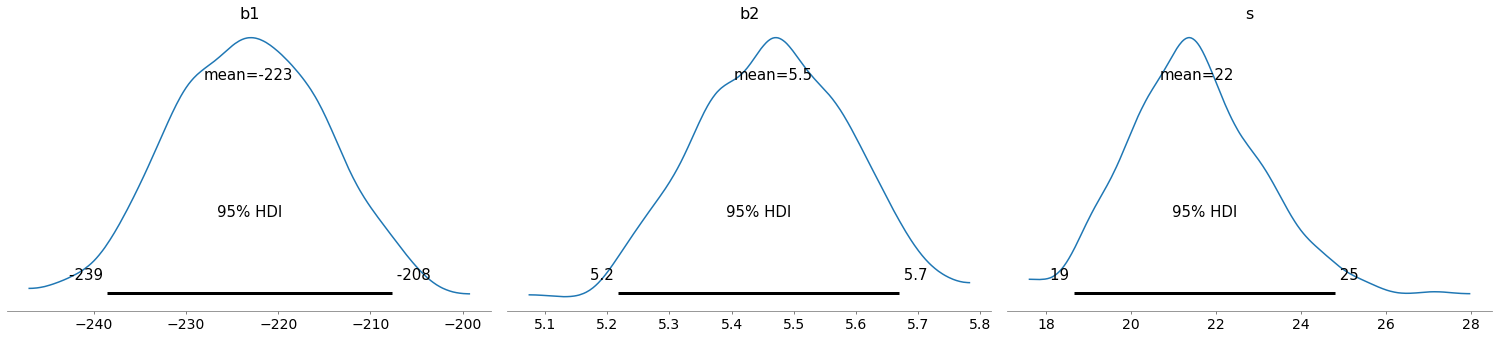

In [ ]:
# Sample Size 100
gen(100)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s, b2, b1]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [35:42<00:00,  1.07s/draws] 
The acceptance probability does not match the target. It is 0.9172843045712088, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9343901461489954, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(


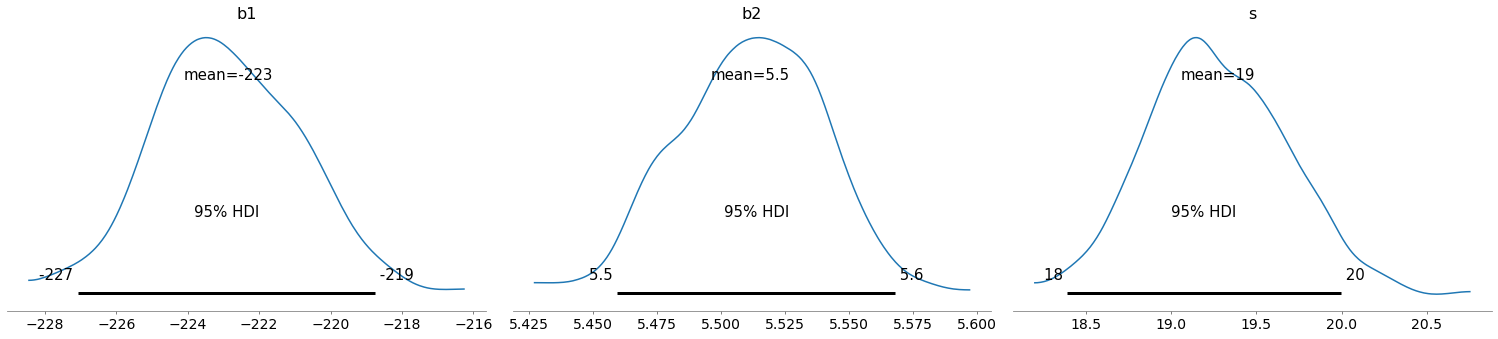

In [ ]:
# Sample Size 1000
gen(1000)
plt.show()

### (ii)
We will now be 

In [ ]:
def generate(trials):
    beta0=-222
    beta1=5.49
    sig=20
    h=sc.stats.norm.rvs(loc=70,scale=20,size=trials)
    w=sc.stats.norm.rvs(loc=beta0+beta1*h,scale=sig)
        
    return(h,w)

def req_posterior(bo,b1,sigma,trial1):
    h=sc.stats.norm.rvs(loc=70,scale=20,size=trial1)
    w=sc.stats.norm.rvs(loc=-222+5.49*h,scale=20)
    with pm.Model() as model:
        beta1=pm.Normal('beta1',mu=bo,sd=150)
        beta2=pm.Normal('beta2',b1,150)
        sig=pm.Normal('sig',sigma,150)
        w_pred = pm.Normal('y_pred', mu= beta1 + beta2*h, sd=sig, observed=w)
        trace=pm.sample(cores=1)
        az.plot_posterior(trace, credible_interval=0.95)

#h,w=generate(10)

#model = LinearRegression().fit(np.array(h).reshape((-1,1)),w)
#bo=model.intercept_
#b1=model.coef_[0]
#w_predicted = model.predict(np.array(h).reshape((-1,1)))
#rms = mean_squared_error(sample_w, w_predicted, squared=False)
#rms=np.sum((w_predicted-w)^2)/8
#rms=np.sum(np.power(np.subtract(w_predicted,w),2))
#posterior_1(h,w,bo,b1,rms)


We will take 10 trial samples and estimate the parameters and use those estimates for the required priors

In [ ]:
h,w=generate(10)

model = LinearRegression().fit(np.array(h).reshape((-1,1)),w)
bo=model.intercept_
b1=model.coef_[0]
w_predicted = model.predict(np.array(h).reshape((-1,1)))
rms=np.sum(np.power(np.subtract(w_predicted,w),2))/8

### (i) 
For 10 samples

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sig, beta2, beta1]
Sampling chain 1, 0 divergences: 100%|██████████| 4500/4500 [02:36<00:00, 28.76it/s]
The number of effective samples is smaller than 25% for some parameters.
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(


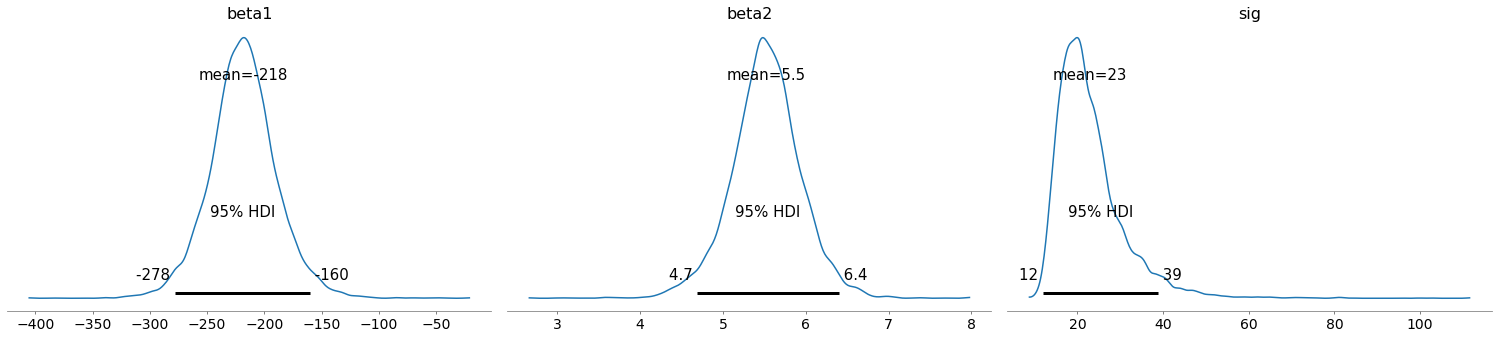

In [ ]:
req_posterior(bo,b1,rms,10)

### (ii)
For 100 samples

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sig, beta2, beta1]
Sampling chain 1, 0 divergences: 100%|██████████| 1000/1000 [03:22<00:00,  4.93it/s]
The acceptance probability does not match the target. It is 0.8890780840203014, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8931683243963043, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\DELL\anaconda3\lib\site-packages\arviz\utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(


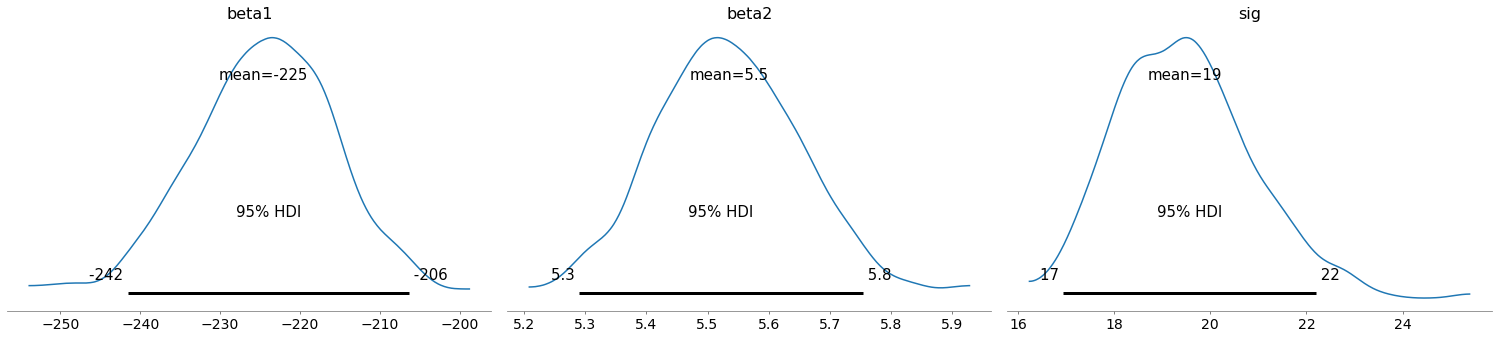

In [ ]:
req_posterior(bo,b1,rms,100)